# Classification

Classification is a supervised learning technique useful when we want to predict discrete variables (like binary outcomes or belonging to a specific class).

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ISP dataset

In [53]:
df = pd.read_csv('../data/isp_data.csv')

In [54]:
df.head()

,download,upload,label
0,2.373546,5.398106,0
1,3.183643,4.387974,0
2,2.164371,5.341120,0
3,4.595281,3.870637,0
4,3.329508,6.433024,0


In [55]:
df['label'].unique()

array([0, 1])

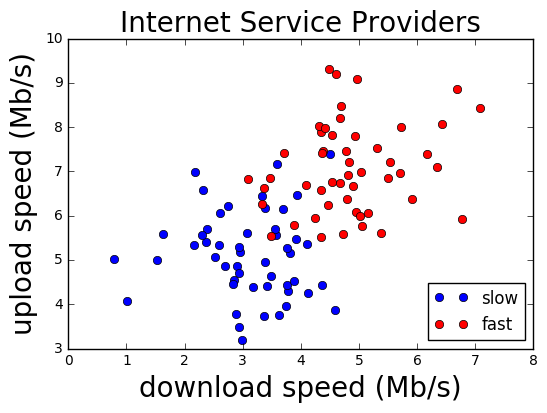

In [56]:
plt.figure()#figsize=(15,10))
alpha = df[df['label'] == 0]
beta  = df[df['label'] == 1]
plt.plot(alpha.download, alpha.upload, 'o', label = 'slow')
plt.plot(beta.download, beta.upload, 'or', label = 'fast')
plt.title('Internet Service Providers', size = 20)
plt.xlabel('download speed (Mb/s)', size = 20)
plt.ylabel('upload speed (Mb/s)', size = 20)
plt.legend(loc = 4)

In [57]:
X = df[['download', 'upload']]
y = df['label']

## Dumb Benchmark

In [58]:
y.value_counts()/float(len(y))

1    0.5
0    0.5
Name: label, dtype: float64

## k-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [72]:
clf = KNeighborsClassifier(10)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [74]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

### Performance evaluation

In [76]:
clf.score(X_test, y_test)

0.90909090909090906

In [78]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report

In [79]:
y_pred = clf.predict(X_test)

print "=======confusion matrix=========="
print
print confusion_matrix(y_test, y_pred)
print
print

print "=====classification report======="
print
print classification_report(y_test, y_pred)

=======confusion matrix==========

[[15  0]
 [ 3 15]]


=====classification report=======

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        15
          1       1.00      0.83      0.91        18

avg / total       0.92      0.91      0.91        33



## Car dataset

In [80]:
from sklearn import tree

df = pd.read_csv('../data/car.csv', dtype='category')

In [81]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null category
maint       1728 non-null category
doors       1728 non-null category
persons     1728 non-null category
lug_boot    1728 non-null category
safety      1728 non-null category
class       1728 non-null category
dtypes: category(7)
memory usage: 12.1 KB


The data mainly categorical. We need to stop here for a second and reflect how to represent this with numbers. We essentially have 2 choices:
- one hot encoding: each column is exploded to multiple binary columns indicating the presence of that particular value. E.g.: buying_vhigh, buying_low, etc..

- number encoding: each value is encoded with a numerical value.

Some columns represent values on a scale (e.g. for safety: low < med < hight), so we could think of a number encoding scheme like:

```
{'low': 1,
 'med': 2,
 'high': 3}
```

However, this scheme would not be ideal, because we don't really know if `med` is worth twice as `low`.

A better encoding scheme is the one hot encoding we use below. Pandas offers a very convenient function for this: `get_dummies`.

In [83]:
X = pd.get_dummies(df[df.columns[:-1]])

The outcome variable is also discrete, and we need to encode it. In this case we will use a number encoding scheme.

In [ ]:
df['class'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(df['class'])
le.classes_

In [ ]:
#*** Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print len(X_train)
print len(X_test)

In [ ]:
model = tree.DecisionTreeClassifier()   #initialize model
model.fit(X_train, y_train)  #It updates model

#*** Test
y_pred = model.predict(X_test)
#print le.inverse_transform(yPred)  #Get the original label name

#*** Get Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print acc

# Exercises
0) benchmark your prediction

as you may have noticed, the labels are highly imbalanced, with most of the data falling in the `{"unacc": 2}` category. What score would you have gotten if you had predicted 2 for all of your test data? (answer: 70%)

1) 
- load the iris.csv dataset
- use the LabelEncoder as shown above to encode the target to numbers
- classify the iris using KNN and DecisionTrees
- which one performs better?

2)
- load the churn dataset
- convert features to numeric
- classify using Decision Tree
- try to improve the score using any of the classifiers used here:
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

3)
- go through the example on digit recognition here:
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py
- discuss with your neighbor about it

4) Visualize a decision tree model:
Learn how to visualize a decision tree here: http://scikit-learn.org/stable/modules/tree.html